# This sample code is used to test the integration of STAIG on slice #151675 and #151676.

### Step 0：Since Jupyter Notebook does not automatically release GPU memory after running, please run this code to clear all processes occupying GPU memory before the FIRST time starting execution.

In [3]:
!fuser -v /dev/nvidia* |awk '{for(i=1;i<=NF;i++)print "kill -9 " $i;}' | sh

Cannot stat file /proc/1117226/fd/0: Permission denied
Cannot stat file /proc/1117226/fd/1: Permission denied
Cannot stat file /proc/1117226/fd/2: Permission denied
Cannot stat file /proc/1117226/fd/3: Permission denied
Cannot stat file /proc/1117226/fd/4: Permission denied
Cannot stat file /proc/1117226/fd/5: Permission denied
Cannot stat file /proc/1117226/fd/8: Permission denied
Cannot stat file /proc/1117231/fd/0: Permission denied
Cannot stat file /proc/1117231/fd/1: Permission denied
Cannot stat file /proc/1117231/fd/2: Permission denied
Cannot stat file /proc/1117231/fd/3: Permission denied
Cannot stat file /proc/1117231/fd/4: Permission denied
Cannot stat file /proc/1117231/fd/5: Permission denied
Cannot stat file /proc/1117231/fd/8: Permission denied
Cannot stat file /proc/1117251/fd/0: Permission denied
Cannot stat file /proc/1117251/fd/1: Permission denied
Cannot stat file /proc/1117251/fd/2: Permission denied
Cannot stat file /proc/1117251/fd/3: Permission denied
Cannot sta

### Step 1: Load packages

In [4]:
import argparse
import os
os.chdir('/remote-home/13186919777/home/STAIG-test')
import warnings
warnings.filterwarnings('ignore')
import random
import yaml
from yaml import SafeLoader
import torch
from staig.adata_processing import LoadBatch10xAdata
import numpy as np
from staig.staig import STAIG
import pandas as pd
import scanpy as sc
from sklearn.cluster import KMeans

### Step 2: Load data and train

In [5]:

file_fold = './Dataset'


args = argparse.Namespace(
    dataset='DLPFC',
    slide='test7576',
    config='train_img_config.yaml',
    label=True,
    filelist=['151675','151676']
)

config = yaml.load(open(args.config), Loader=SafeLoader)[str(args.slide)]
slide_path = os.path.join(file_fold, args.dataset)

torch.manual_seed(config['seed'])
np.random.seed(config['seed'])
if torch.cuda.is_available():
    torch.cuda.manual_seed(config['seed'])
    torch.cuda.manual_seed_all(config['seed'])
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
random.seed(12345)

data = LoadBatch10xAdata(dataset_path=slide_path,file_list = args.filelist,n_neighbors=config['num_neigh'],n_top_genes=config['num_gene'],image_emb=True, label = args.label).run()
staig = STAIG(args=args,config=config,single=False,refine=False)    
staig.adata = data
staig.train()
staig.eva()

now load: 151675
151675 load label done
151675 filter NA done
151675 load img embedding done
151675 build local graph done
151675 added to list
now load: 151676
151676 load label done
151676 filter NA done
151676 load img embedding done
151676 build local graph done
151676 added to list
load all slices done
merge done
now calculate edge weights
calculate edge weights done
merge adata load done
=== prepare for training ===
=== train ===


100%|██████████| [00:26<00:00, 21.18it/s]


=== load ===
embedding generated, go clustering


### Step 3: Show results

In [6]:
staig.cluster(args.label)

fitting ...
  |======================================================================| 100%
calculate metric ARI
ARI: 0.6388840203233114
NMI: 0.7062671028637794
BatchKL= [0.16334504]
Median ILISI: 1.89


### Step 4: Show UMAP

start umap


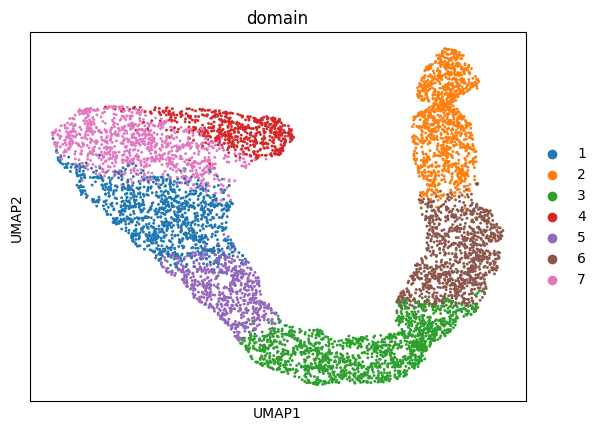

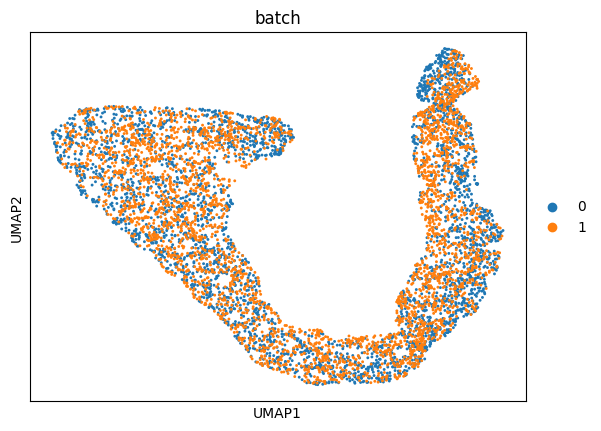

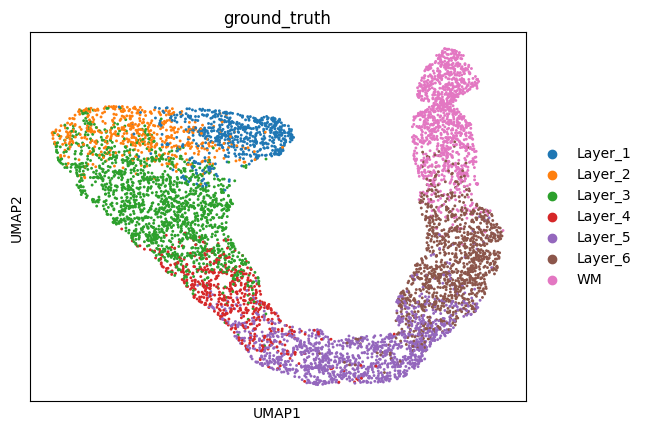

In [7]:
staig.draw_umap()